In [1]:
# --- Provided by freeCodeCamp ---
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# --- Provided by freeCodeCamp ---
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
#dataset.tail()

--2024-09-08 01:54:04--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.002s  

2024-09-08 01:54:04 (29.2 MB/s) - ‘insurance.csv’ saved [50264/50264]



In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


<Axes: >

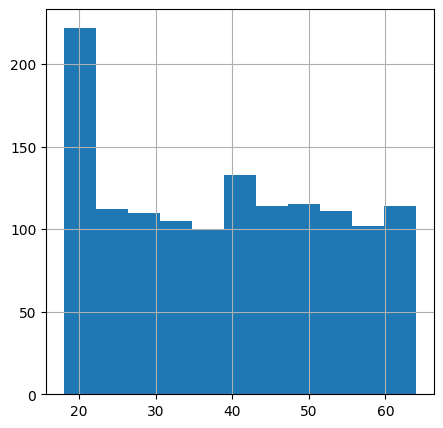

In [7]:
dataset['age'].hist(bins=11, figsize=(5, 5))

In [8]:
dataset['age_norm'] = (dataset['age'] - dataset['age'].min()) / (dataset['age'].max() - dataset['age'].min())
dataset

,age,sex,bmi,children,smoker,region,expenses,age_norm
0,19,female,27.9,0,yes,southwest,16884.92,0.021739
1,18,male,33.8,1,no,southeast,1725.55,0.000000
2,28,male,33.0,3,no,southeast,4449.46,0.217391
3,33,male,22.7,0,no,northwest,21984.47,0.326087
4,32,male,28.9,0,no,northwest,3866.86,0.304348
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,0.695652
1334,18,female,31.9,0,no,northeast,2205.98,0.000000
1335,18,female,36.9,0,no,southeast,1629.83,0.000000
1336,21,female,25.8,0,no,southwest,2007.95,0.065217


In [9]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [10]:
#
dataset['sex_enc'] = (dataset['sex'] == 'male').astype(int)
dataset

,age,sex,bmi,children,smoker,region,expenses,age_norm,sex_enc
0,19,female,27.9,0,yes,southwest,16884.92,0.021739,0
1,18,male,33.8,1,no,southeast,1725.55,0.000000,1
2,28,male,33.0,3,no,southeast,4449.46,0.217391,1
3,33,male,22.7,0,no,northwest,21984.47,0.326087,1
4,32,male,28.9,0,no,northwest,3866.86,0.304348,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,0.695652,1
1334,18,female,31.9,0,no,northeast,2205.98,0.000000,0
1335,18,female,36.9,0,no,southeast,1629.83,0.000000,0
1336,21,female,25.8,0,no,southwest,2007.95,0.065217,0


<Axes: >

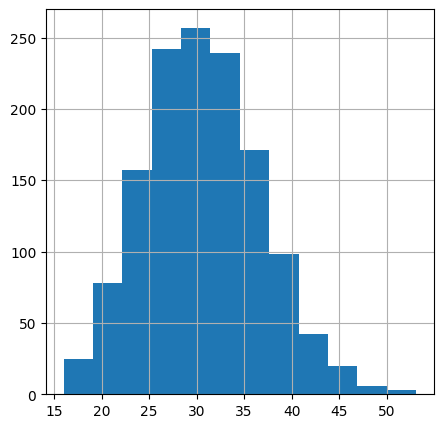

In [11]:
dataset['bmi'].hist(bins=12, figsize=(5, 5))

In [12]:
# Assume a normal distribution
# 生物統計のエッセンス ―その 1― 浦島充佳, 2018
dataset['bmi_norm'] = (dataset['bmi'] - dataset['bmi'].mean()) / dataset['bmi'].std()
dataset.loc[dataset['bmi_norm'] > 3, 'bmi_norm'] = 3
dataset['bmi_norm'] = dataset['bmi_norm'] / 3
dataset

,age,sex,bmi,children,smoker,region,expenses,age_norm,sex_enc,bmi_norm
0,19,female,27.9,0,yes,southwest,16884.92,0.021739,0,-0.151159
1,18,male,33.8,1,no,southeast,1725.55,0.000000,1,0.171331
2,28,male,33.0,3,no,southeast,4449.46,0.217391,1,0.127604
3,33,male,22.7,0,no,northwest,21984.47,0.326087,1,-0.435387
4,32,male,28.9,0,no,northwest,3866.86,0.304348,1,-0.096499
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,0.695652,1,0.018285
1334,18,female,31.9,0,no,northeast,2205.98,0.000000,0,0.067479
1335,18,female,36.9,0,no,southeast,1629.83,0.000000,0,0.340775
1336,21,female,25.8,0,no,southwest,2007.95,0.065217,0,-0.265943


<Axes: >

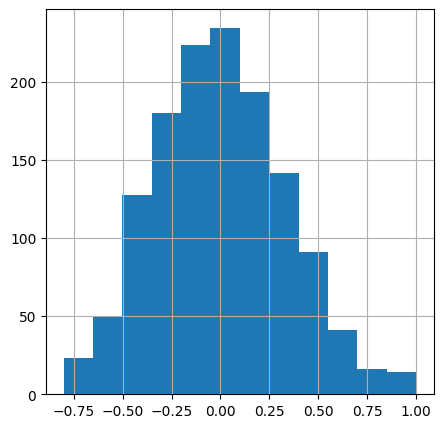

In [13]:
dataset['bmi_norm'].hist(bins=12, figsize=(5, 5))

In [14]:
dataset['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [15]:
dataset['children_norm'] = (dataset['children'] - dataset['children'].min()) / (dataset['children'].max() - dataset['children'].min())
dataset

,age,sex,bmi,children,smoker,region,expenses,age_norm,sex_enc,bmi_norm,children_norm
0,19,female,27.9,0,yes,southwest,16884.92,0.021739,0,-0.151159,0.0
1,18,male,33.8,1,no,southeast,1725.55,0.000000,1,0.171331,0.2
2,28,male,33.0,3,no,southeast,4449.46,0.217391,1,0.127604,0.6
3,33,male,22.7,0,no,northwest,21984.47,0.326087,1,-0.435387,0.0
4,32,male,28.9,0,no,northwest,3866.86,0.304348,1,-0.096499,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,0.695652,1,0.018285,0.6
1334,18,female,31.9,0,no,northeast,2205.98,0.000000,0,0.067479,0.0
1335,18,female,36.9,0,no,southeast,1629.83,0.000000,0,0.340775,0.0
1336,21,female,25.8,0,no,southwest,2007.95,0.065217,0,-0.265943,0.0


In [16]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [17]:
dataset['smoker_enc'] = (dataset['smoker'] == 'no').astype(int)
dataset

,age,sex,bmi,children,smoker,region,expenses,age_norm,sex_enc,bmi_norm,children_norm,smoker_enc
0,19,female,27.9,0,yes,southwest,16884.92,0.021739,0,-0.151159,0.0,0
1,18,male,33.8,1,no,southeast,1725.55,0.000000,1,0.171331,0.2,1
2,28,male,33.0,3,no,southeast,4449.46,0.217391,1,0.127604,0.6,1
3,33,male,22.7,0,no,northwest,21984.47,0.326087,1,-0.435387,0.0,1
4,32,male,28.9,0,no,northwest,3866.86,0.304348,1,-0.096499,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,0.695652,1,0.018285,0.6,1
1334,18,female,31.9,0,no,northeast,2205.98,0.000000,0,0.067479,0.0,1
1335,18,female,36.9,0,no,southeast,1629.83,0.000000,0,0.340775,0.0,1
1336,21,female,25.8,0,no,southwest,2007.95,0.065217,0,-0.265943,0.0,1


In [18]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [19]:
dataset = dataset.join(pd.get_dummies(dataset['region']).astype(int))
dataset

,age,sex,bmi,children,smoker,region,expenses,age_norm,sex_enc,bmi_norm,children_norm,smoker_enc,northeast,northwest,southeast,southwest
0,19,female,27.9,0,yes,southwest,16884.92,0.021739,0,-0.151159,0.0,0,0,0,0,1
1,18,male,33.8,1,no,southeast,1725.55,0.000000,1,0.171331,0.2,1,0,0,1,0
2,28,male,33.0,3,no,southeast,4449.46,0.217391,1,0.127604,0.6,1,0,0,1,0
3,33,male,22.7,0,no,northwest,21984.47,0.326087,1,-0.435387,0.0,1,0,1,0,0
4,32,male,28.9,0,no,northwest,3866.86,0.304348,1,-0.096499,0.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,0.695652,1,0.018285,0.6,1,0,1,0,0
1334,18,female,31.9,0,no,northeast,2205.98,0.000000,0,0.067479,0.0,1,1,0,0,0
1335,18,female,36.9,0,no,southeast,1629.83,0.000000,0,0.340775,0.0,1,0,0,1,0
1336,21,female,25.8,0,no,southwest,2007.95,0.065217,0,-0.265943,0.0,1,0,0,0,1


<Axes: >

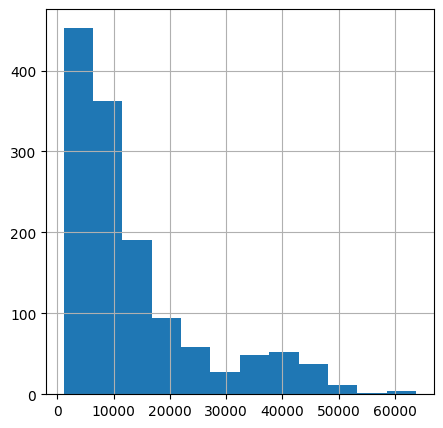

In [20]:
dataset['expenses'].hist(bins=12, figsize=(5, 5))

In [21]:
dataset.shape

(1338, 16)

In [22]:
# create train and test dataset
use_column = ['age_norm', 'bmi_norm', 'smoker_enc']
train_dataset = dataset.loc[:int(dataset.shape[0] * 0.8), use_column]
train_labels = dataset.loc[:int(dataset.shape[0] * 0.8), 'expenses']
test_dataset = dataset.loc[int(dataset.shape[0] * 0.8):, use_column]
test_labels = dataset.loc[int(dataset.shape[0] * 0.8):, 'expenses']

In [23]:
train_dataset

,age_norm,bmi_norm,smoker_enc
0,0.021739,-0.151159,0
1,0.000000,0.171331,1
2,0.217391,0.127604,1
3,0.326087,-0.435387,1
4,0.304348,-0.096499,1
...,...,...,...
1066,0.652174,0.362639,1
1067,0.456522,0.657799,1
1068,0.978261,-0.490046,1
1069,0.782609,0.067479,1


In [24]:
train_labels

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1066,8978.19
1067,5757.41
1068,14349.85
1069,10928.85


In [25]:
test_dataset

,age_norm,bmi_norm,smoker_enc
1070,0.413043,0.351707,0
1071,0.978261,0.040149,1
1072,0.065217,0.034683,1
1073,0.782609,-0.096499,1
1074,0.913043,-0.675888,1
...,...,...,...
1333,0.695652,0.018285,1
1334,0.000000,0.067479,1
1335,0.000000,0.340775,1
1336,0.065217,-0.265943,1


In [26]:
test_labels

,expenses
1070,39871.70
1071,13974.46
1072,1909.53
1073,12096.65
1074,13204.29
...,...
1333,10600.55
1334,2205.98
1335,1629.83
1336,2007.95


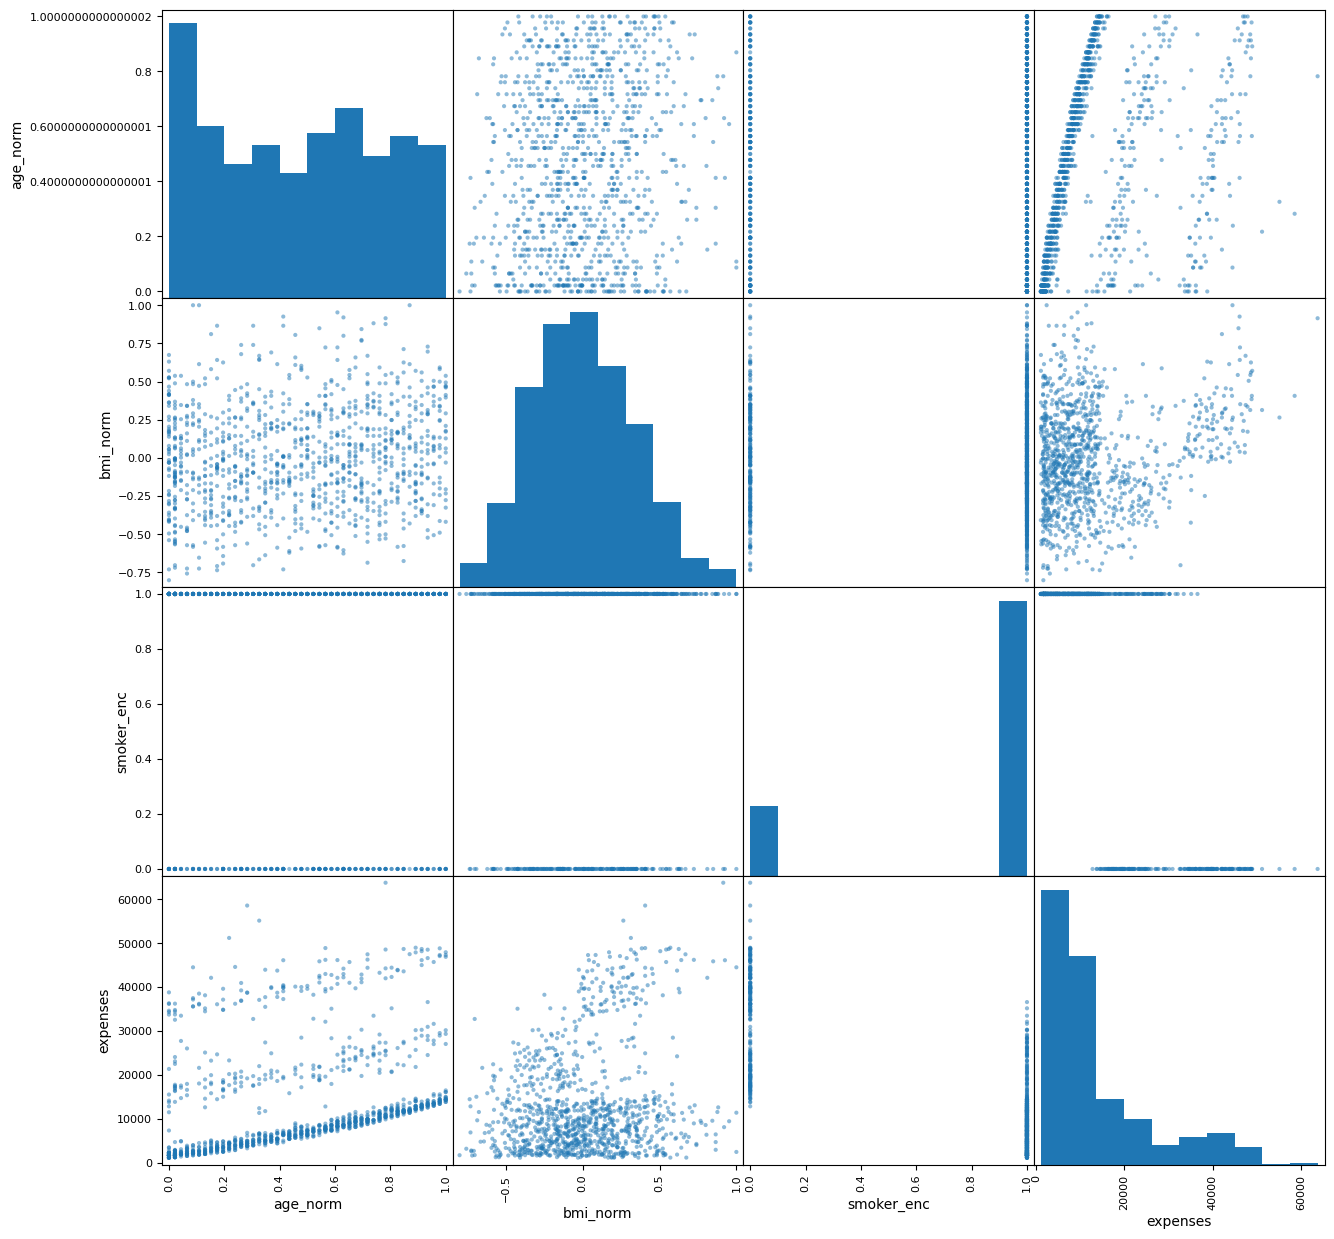

In [27]:
grr = pd.plotting.scatter_matrix(train_dataset.join(train_labels), figsize=(15, 15))

In [28]:
model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(train_dataset.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(train_dataset.values, train_labels.values, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 320121408.0000 - mean_absolute_error: 13253.1855 - mean_squared_error: 320121408.0000
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 322598400.0000 - mean_absolute_error: 13181.6973 - mean_squared_error: 322598400.0000
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 308681728.0000 - mean_absolute_error: 12822.0859 - mean_squared_error: 308681728.0000
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 322003200.0000 - mean_absolute_error: 13066.9160 - mean_squared_error: 322003200.0000
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 298842656.0000 - mean_absolute_error: 12417.1494 - mean_squared_error: 298842656.0000
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 285915104.0000 - mean_absolute_error: 11368.0303 - mean_squared_error: 285915104.0000
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 232606288.0000 - mean_absolute_error: 9335.6943 - mean_squared_error

9/9 - 0s - 4ms/step - loss: 24973198.0000 - mean_absolute_error: 3047.8547 - mean_squared_error: 24973198.0000
Testing set Mean Abs Error: 3047.85 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


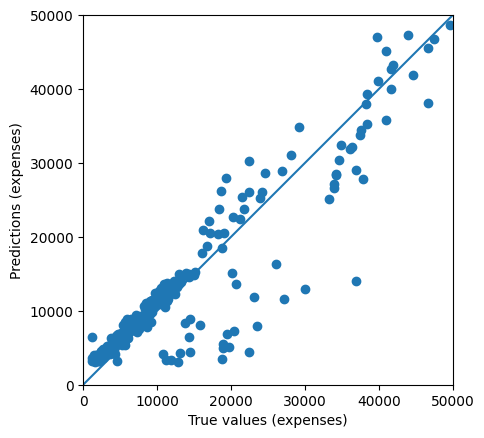

In [30]:
# --- Provided by freeCodeCamp ---
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
